# Imputation Techniques

Embark on the world of data imputation! In this chapter, you will apply basic imputation techniques to fill in missing data and visualize your imputations to be able to evaluate your imputations' performance. 

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import rand
from sklearn.impute import SimpleImputer

# the data file provided by datacamp (pima-indians-diabetes-data.csv) and the
# one being used in the exercises (pima_indians_diabetes.csv) have different
# data and it throws off the examples
# diabetes = pd.read_csv("data/pima-indians-diabetes-data.csv")
diabetes = pd.read_csv("data/pima_indians_diabetes.csv")

The simplest way to impute missing values is to replace them with constant values like 0.

Descriptive statistics like mean, median, and mode are very common too.

## Mean imputation

To perform the imputations, import `SimpleImputer` from `sklearn.impute`, make a copy of the dataset, and pass that copy to `fit_transform()` which computes $\mu$ and $\sigma$, ala `fit()` and then applies the transform to the data, ala `transform()` effectively combining these two functions.

In [66]:
diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

`fit_transform()` returns a `numpy` array so we need to slice it over all the elements of `diabetes_mean` using `iloc`.

## Median imputation

To perform median imputation, simply change `strategy` to `median`.

In [67]:
diabetes_median = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="median")
diabetes_median.iloc[:, :] = mean_imputer.fit_transform(diabetes_median)

## Mode imputation

To perform median imputation, simply change `strategy` to `most_frequent`.

In [68]:
diabetes_mode = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="most_frequent")
diabetes_mode.iloc[:, :] = mean_imputer.fit_transform(diabetes_mode)

## Constant imputation

You can also impute all missing values with a constant by changing `strategy` to `constant` and supplying an `int`, `float`, or `str` for `fill_value`.

In [69]:
diabetes_constant = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="constant", fill_value=0)
diabetes_constant.iloc[:, :] = mean_imputer.fit_transform(diabetes_constant)

## Scatterplot of imputation

Using the last chapter's scatterplot technique, we plot the mean imputed values.

<Axes: title={'center': 'Mean Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

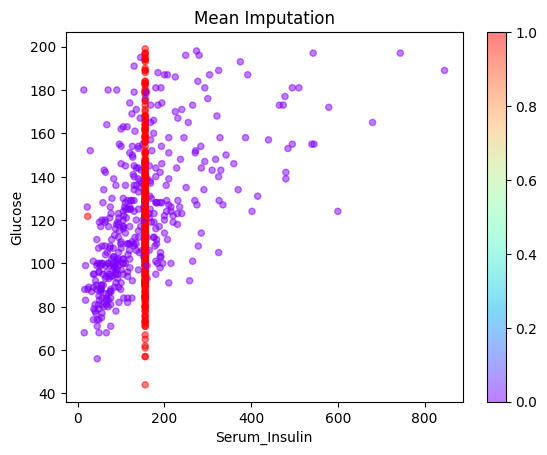

In [70]:
nullity = diabetes.loc[:, "Serum_Insulin"].isnull() + diabetes.loc[:, "Glucose"].isnull()

diabetes_mean.plot(
    x="Serum_Insulin", y="Glucose", kind="scatter", alpha=0.5, c=nullity, cmap="rainbow", title="Mean Imputation"
)

If we want to compare different imputations we'll have to plot subplots of them all in a single graph.

## Visualizing imputations

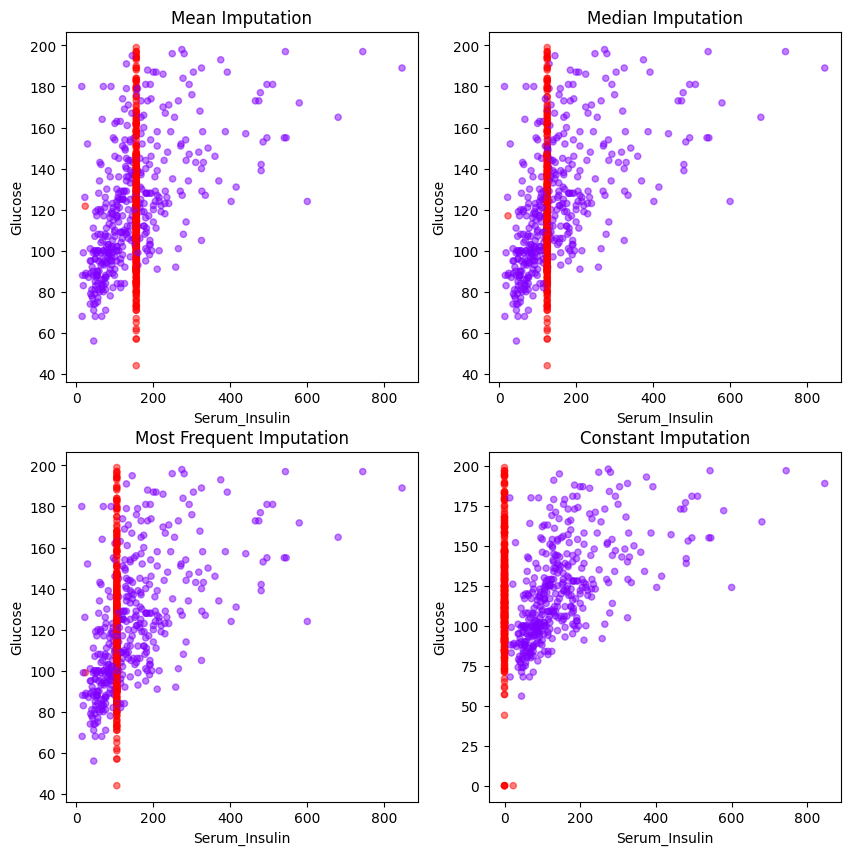

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

nullity = diabetes.loc[:, "Serum_Insulin"].isnull() + diabetes.loc[:, "Glucose"].isnull()

imputations = {
    "Mean Imputation": diabetes_mean,
    "Median Imputation": diabetes_median,
    "Most Frequent Imputation": diabetes_mode,
    "Constant Imputation": diabetes_constant,
}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(
        x="Serum_Insulin",
        y="Glucose",
        kind="scatter",
        alpha=0.5,
        c=nullity,
        cmap="rainbow",
        ax=ax,
        colorbar=False,
        title=df_key,
    )

Observing the graph, there's a clear correlation between `'Serum_Insulin'` and `'Glucose'`.

However, the imputed values which are red just lie in a straight line as the imputed values do not vary against the other variable. Therefore, we can conclude that mean, median and mode imputations only preserve these basic statistical features of the dataset but *don't* account for their correlations. This results in a bias in the dataset. In the next lessons, we will learn about more robust imputation techniques. 

#### Mean & median imputation

Imputing missing values is the best method when you have large amounts of data to deal with. The simplest methods to impute missing values include filling in a constant or the mean of the variable or other basic statistical parameters like median and mode.

In this exercise, you'll impute the missing values with the mean and median for each of the columns. The DataFrame `diabetes` has been loaded for you. `SimpleImputer()` from `sklearn.impute` has also been imported for you to use.

##### Instructions 1/2

* Create a `SimpleImputer()` object while performing mean imputation.
* Impute the copied DataFrame.

In [72]:
diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

##### Instructions 2/2

* Create a `SimpleImputer()` object while performing median imputation.
* Impute the copied DataFrame.

In [73]:
diabetes_median = diabetes.copy(deep=True)
median_imputer = SimpleImputer(strategy="median")
diabetes_median.iloc[:, :] = mean_imputer.fit_transform(diabetes_median)

#### Mode and constant imputation

Filling in missing values with mean, median, constant and mode is highly suitable when you have to deal with a relatively small amount of missing values. In the previous exercise, you imputed using the mean and median methods. In this exercise, you'll fill in the most frequent values in the column and also perform another imputation by filling in a constant value.

As before, the `diabetes` DataFrame and the function `SimpleImputer()` have been loaded for you.

##### Instructions 1/2

* Create a `SimpleImputer()` object while performing mode (or most frequent) imputation.
* Impute the copied DataFrame.

In [74]:
diabetes_mode = diabetes.copy(deep=True)
mode_imputer = SimpleImputer(strategy="most_frequent")
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

##### Instructions 2/2

* Create a `SimpleImputer()` object while filling missing values to 0.
* Impute the copied DataFrame.

In [75]:
diabetes_constant = diabetes.copy(deep=True)
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

#### Visualize imputations

Analyzing imputations and choosing the best one, is a task that requires lots of experimentation. It is important to make sure that your data does not become biased while imputing. In this last two exercises, you created 4 different imputations using mean, median, mode, and constant filling imputations.

In this exercise, you'll create a scatterplot of the DataFrames you imputed previously. To achieve this, you'll create a dictionary of the DataFrames with the keys being their title.

The DataFrames `diabetes_mean`, `diabetes_median`, `diabetes_mode` and `diabetes_constant` have been loaded for you.

##### Instructions

* Create 4 subplots by making a plot with 2 rows and 2 columns.
* Create the dictionary `imputations` by mapping each key with its matching DataFrame.
* Loop over `axes` and `imputations`, and plot each DataFrame in `imputations`.
* Set the color to the `nullity` and the title for each subplot to the name of the imputation.

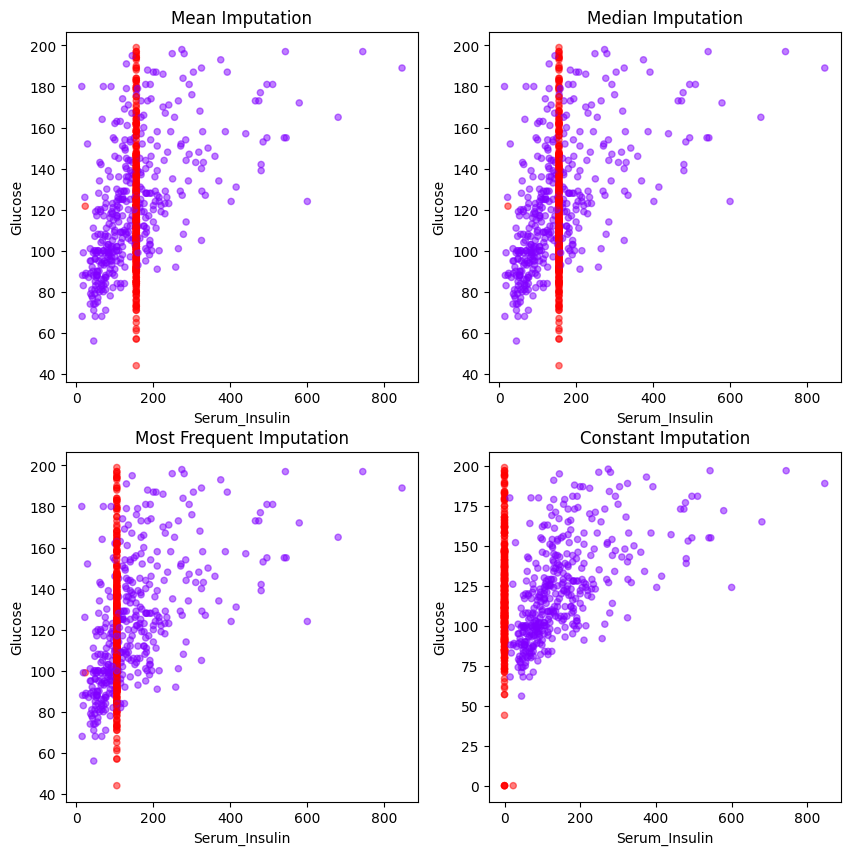

In [76]:
ig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

nullity = diabetes.loc[:, "Serum_Insulin"].isnull() + diabetes.loc[:, "Glucose"].isnull()

imputations = {
    "Mean Imputation": diabetes_mean,
    "Median Imputation": diabetes_median,
    "Most Frequent Imputation": diabetes_mode,
    "Constant Imputation": diabetes_constant,
}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(
        x="Serum_Insulin",
        y="Glucose",
        kind="scatter",
        alpha=0.5,
        c=nullity,
        cmap="rainbow",
        ax=ax,
        colorbar=False,
        title=df_key,
    )

## Imputing time-series data

Imputing time-series data requires a different approach.

In [77]:
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

print(airquality.head())
print("\nCount the number of missing values:")
print(airquality.isna().sum())
print("\nCount the % of missing values:")
print(round(airquality.isna().mean() * 100, 1))

            Ozone  Solar  Wind  Temp
Date                                
1976-05-01   41.0  190.0   7.4    67
1976-05-02   36.0  118.0   8.0    72
1976-05-03   12.0  149.0  12.6    74
1976-05-04   18.0  313.0  11.5    62
1976-05-05    NaN    NaN  14.3    56

Count the number of missing values:
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

Count the % of missing values:
Ozone    24.2
Solar     4.6
Wind      0.0
Temp      0.0
dtype: float64


## The .fillna() method

We can use `.fillna()` method to impute missing tine-series data.

The `method` argument in `.fillna()` can be set to:

* `ffill`: propagate last valid observation forward to next valid
* `bfill`/`backfill`: use next valid observation to fill gap

`.fillna` with `method` been deprecated as of pandas 2.1.0. Use `obj.ffill()` or `obj.bfill()` instead.

Lots of interesting options, see the [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

In [78]:
# airquality["Ozone"][30:40]
airquality.loc[airquality.index[30:40], "Ozone"]

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64

In [79]:
aq = airquality.copy(deep=True)

aq.fillna(method="ffill", inplace=True)
aq.loc[aq.index[30:40], "Ozone"]

/tmp/ipykernel_5188/4081148071.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aq.fillna(method="ffill", inplace=True)


Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    37.0
1976-06-05    37.0
1976-06-06    37.0
1976-06-07    29.0
1976-06-08    29.0
1976-06-09    71.0
Name: Ozone, dtype: float64

In [80]:
aq = airquality.copy(deep=True)

aq.fillna(method="bfill", inplace=True)
aq.loc[aq.index[30:40], "Ozone"]

/tmp/ipykernel_5188/288358184.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aq.fillna(method="bfill", inplace=True)


Date
1976-05-31    37.0
1976-06-01    29.0
1976-06-02    29.0
1976-06-03    29.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    71.0
1976-06-09    71.0
Name: Ozone, dtype: float64

### Interpolation

#### Linear

```python
df.interpolate(method="linear")
```

[docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [81]:
aq = airquality.copy(deep=True)

aq.interpolate(method="linear", inplace=True)
aq.loc[aq.index[30:40], "Ozone"]

Date
1976-05-31    37.000000
1976-06-01    35.857143
1976-06-02    34.714286
1976-06-03    33.571429
1976-06-04    32.428571
1976-06-05    31.285714
1976-06-06    30.142857
1976-06-07    29.000000
1976-06-08    50.000000
1976-06-09    71.000000
Name: Ozone, dtype: float64

#### Quadratic

```python
df.interpolate(method="quadratic)
```

In [82]:
aq = airquality.copy(deep=True)

aq.interpolate(method="quadratic", inplace=True)
aq.loc[aq.index[30:40], "Ozone"]

Date
1976-05-31    37.000000
1976-06-01   -38.361123
1976-06-02   -79.352735
1976-06-03   -85.974836
1976-06-04   -62.354606
1976-06-05   -33.255133
1976-06-06    -2.803598
1976-06-07    29.000000
1976-06-08    62.155660
1976-06-09    71.000000
Name: Ozone, dtype: float64

### Nearest value

A combination of `ffill` and `bfill`.

```python
df.interpolate(method="nearest")
```

In [83]:
aq = airquality.copy(deep=True)

aq.interpolate(method="nearest", inplace=True)
aq.loc[aq.index[30:40], "Ozone"]

Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    29.0
1976-06-09    71.0
Name: Ozone, dtype: float64

#### Filling missing time-series data

Imputing time-series data requires a specialized treatment. Time-series data usually comes with special characteristics such trend, seasonality and cyclicality of which we can exploit when imputing missing values in the data. In the `airquality` DataFrame, you can observe these characteristics. Your goal is to impute the values in such a way that these characteristics are accounted for.

In this exercise, you'll try using the .fillna() method to impute time-series data. You will use the forward fill and backward fill strategies for imputing time series data.

##### Instructions 1/2

* Impute missing values using the forward fill method.

In [84]:
# reset the dataset
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

# airquality[30:40]
airquality.loc[airquality.index[30:40]]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,NaN,286.0,8.6,78
1976-06-02,NaN,287.0,9.7,74
1976-06-03,NaN,242.0,16.1,67
1976-06-04,NaN,186.0,9.2,84
1976-06-05,NaN,220.0,8.6,85
1976-06-06,NaN,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,NaN,273.0,6.9,87


In [85]:
airquality.ffill(inplace=True)

# airquality[30:40]
airquality.loc[airquality.index[30:40]]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,37.0,286.0,8.6,78
1976-06-02,37.0,287.0,9.7,74
1976-06-03,37.0,242.0,16.1,67
1976-06-04,37.0,186.0,9.2,84
1976-06-05,37.0,220.0,8.6,85
1976-06-06,37.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,29.0,273.0,6.9,87


##### Instructions 2/2

* Impute missing values using the backward fill method.

In [86]:
# reset the dataset
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

airquality.bfill(inplace=True)

# airquality[30:40]
airquality.loc[airquality.index[30:40]]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,29.0,286.0,8.6,78
1976-06-02,29.0,287.0,9.7,74
1976-06-03,29.0,242.0,16.1,67
1976-06-04,29.0,186.0,9.2,84
1976-06-05,29.0,220.0,8.6,85
1976-06-06,29.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,71.0,273.0,6.9,87


#### Impute with interpolate method

Time-series data have trends of ups and downs against time. For this, filling flat series of values using methods like forward fill or backward fill is not suitable. A more apt imputation would be to use methods like linear or quadratic imputation, where the values are filled with incrementing or decrementing values.

In this exercise, you will work with the `.interpolate()` method on the `airquality` DataFrame. You will use linear, quadratic and nearest methods. You can also find the detailed list of strategies for interpolation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

##### Instructions 1/3

* Interpolate missing values with the linear method.

In [87]:
# reset the dataset
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

airquality = airquality.infer_objects()
airquality.interpolate(method="linear", inplace=True)

# airquality[30:40]
airquality.loc[airquality.index[30:40]]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.000000,279.0,7.4,76
1976-06-01,35.857143,286.0,8.6,78
1976-06-02,34.714286,287.0,9.7,74
1976-06-03,33.571429,242.0,16.1,67
1976-06-04,32.428571,186.0,9.2,84
1976-06-05,31.285714,220.0,8.6,85
1976-06-06,30.142857,264.0,14.3,79
1976-06-07,29.000000,127.0,9.7,82
1976-06-08,50.000000,273.0,6.9,87


##### Instructions 2/3

* Interpolate missing values with the quadratic method.

In [94]:
# reset the dataset
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

airquality.interpolate(method="quadratic", inplace=True)

# airquality[30:40]
airquality.loc[airquality.index[30:40]]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.000000,279.0,7.4,76
1976-06-01,-38.361123,286.0,8.6,78
1976-06-02,-79.352735,287.0,9.7,74
1976-06-03,-85.974836,242.0,16.1,67
1976-06-04,-62.354606,186.0,9.2,84
1976-06-05,-33.255133,220.0,8.6,85
1976-06-06,-2.803598,264.0,14.3,79
1976-06-07,29.000000,127.0,9.7,82
1976-06-08,62.155660,273.0,6.9,87


##### Instructions 3/3

* Interpolate missing values with the nearest method.

In [95]:
# reset the dataset
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

airquality.interpolate(method="nearest", inplace=True)

# airquality[30:40]
airquality.loc[airquality.index[30:40]]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,37.0,286.0,8.6,78
1976-06-02,37.0,287.0,9.7,74
1976-06-03,37.0,242.0,16.1,67
1976-06-04,29.0,186.0,9.2,84
1976-06-05,29.0,220.0,8.6,85
1976-06-06,29.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,29.0,273.0,6.9,87


## Visualizing time-series imputations

To graphically compare the quality of various imputation methods.

Plot the data and observe that it has many gaps.

<Axes: title={'center': 'Ozone'}, xlabel='Date'>

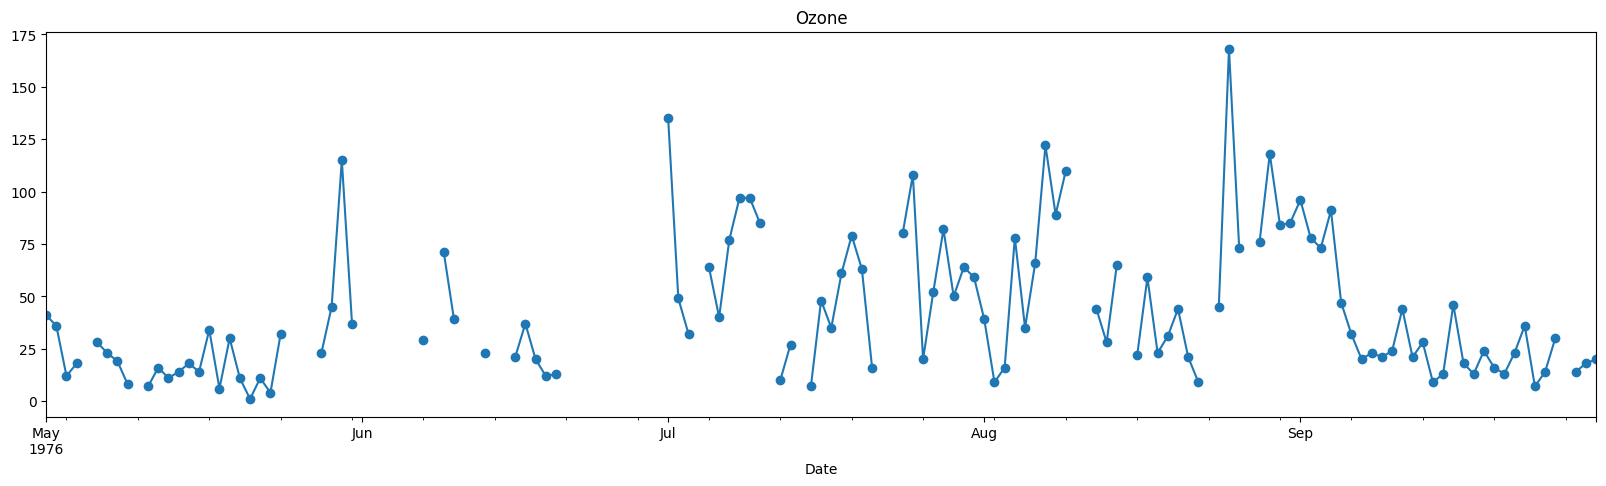

In [96]:
# reset the dataset
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

airquality["Ozone"].plot(title="Ozone", marker="o", figsize=(20, 5))

<Axes: title={'center': 'Ozone'}, xlabel='Date'>

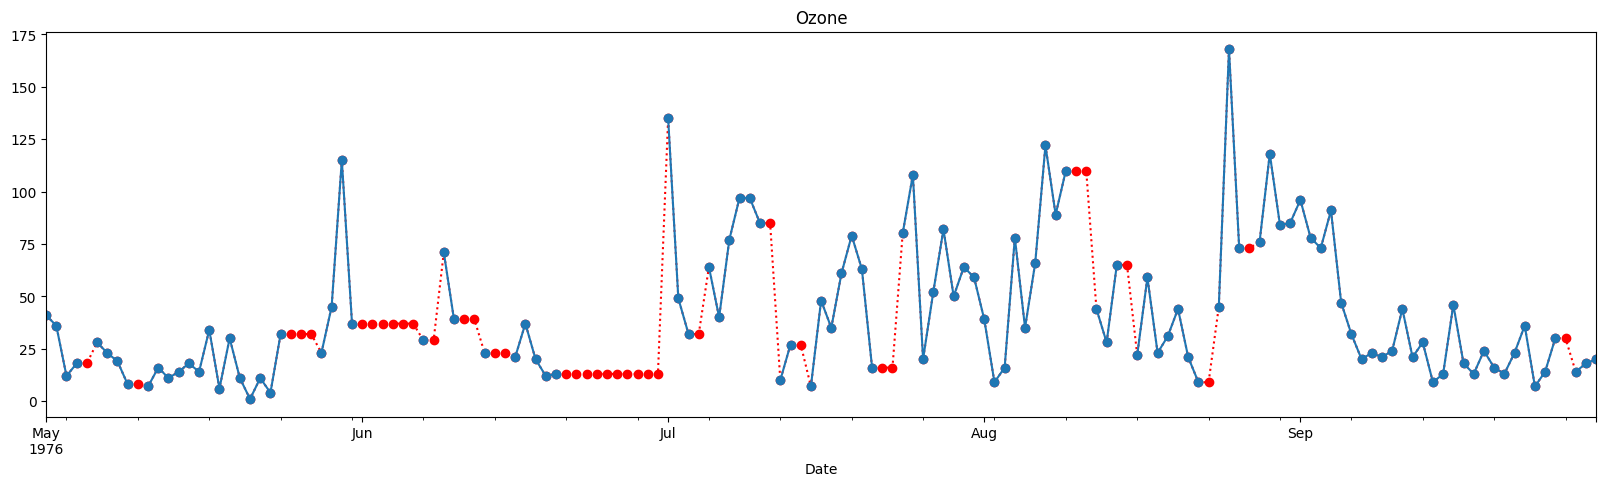

In [97]:
ffill_imp = airquality.ffill()

ffill_imp["Ozone"].plot(color="red", marker="o", linestyle="dotted", figsize=(20, 5))
airquality["Ozone"].plot(title="Ozone", marker="o")

Forward filling the `NaN` values with the last observed value doesn't seem optimal.

<Axes: title={'center': 'Ozone'}, xlabel='Date'>

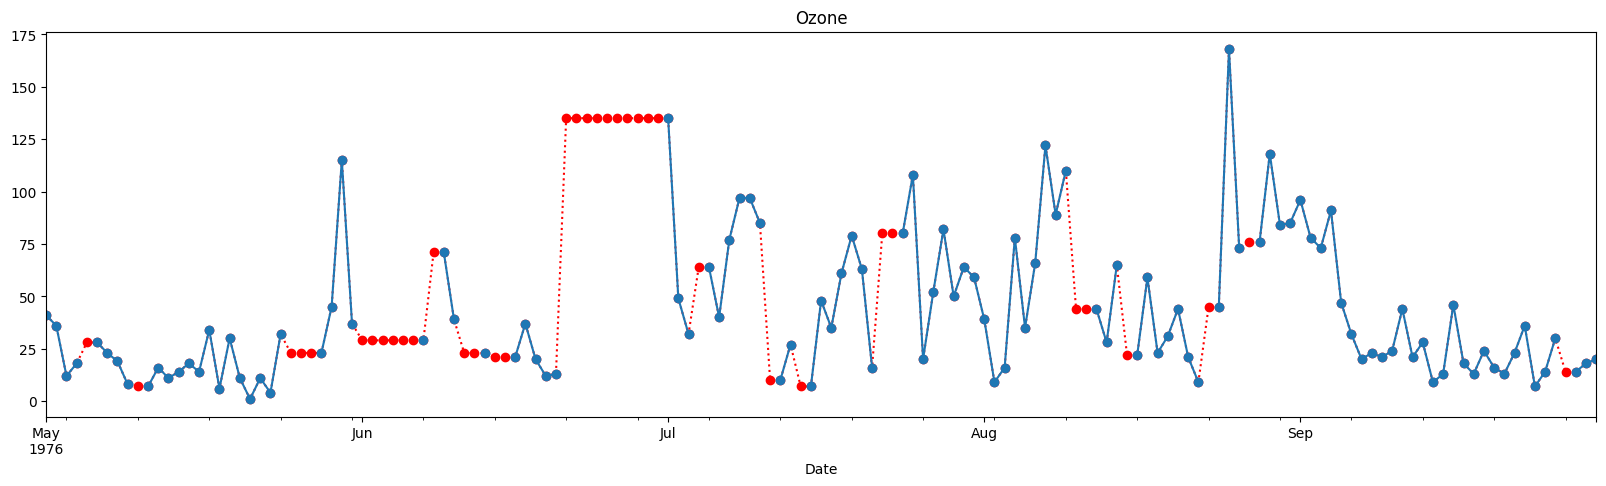

In [98]:
bfill_imp = airquality.bfill()

bfill_imp["Ozone"].plot(color="red", marker="o", linestyle="dotted", figsize=(20, 5))
airquality["Ozone"].plot(title="Ozone", marker="o")

Back filling doesn't seem any better.

<Axes: title={'center': 'Ozone'}, xlabel='Date'>

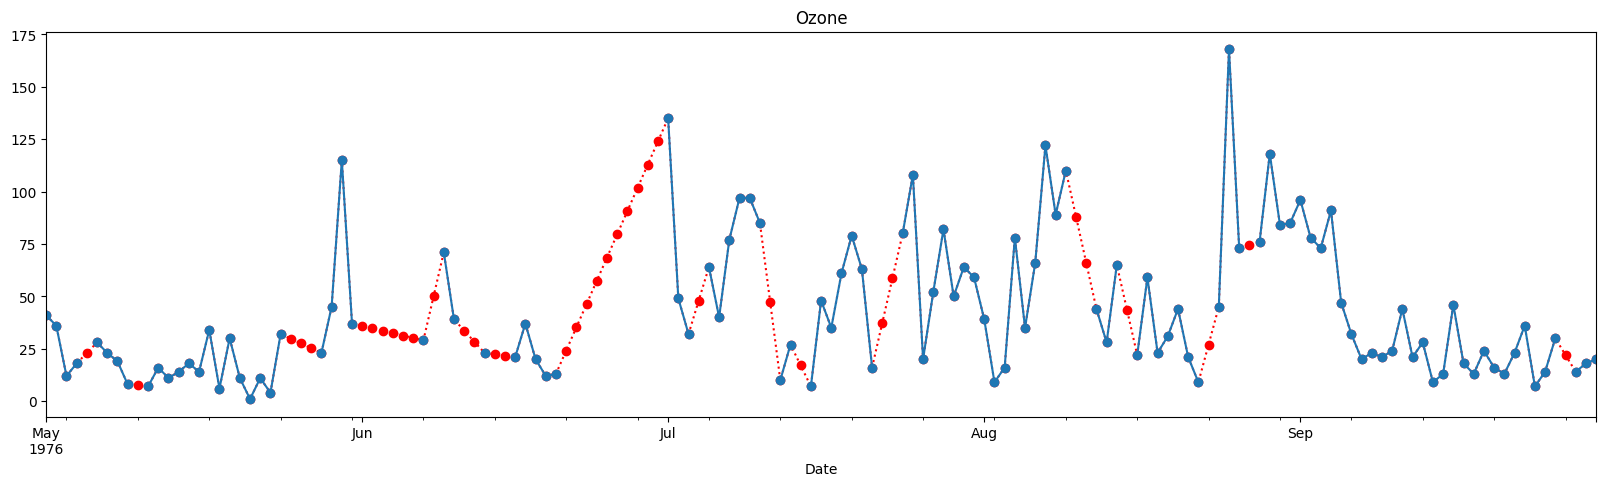

In [102]:
linear_imp = airquality.infer_objects().interpolate(method="linear")

linear_imp["Ozone"].plot(color="red", marker="o", linestyle="dotted", figsize=(20, 5))
airquality["Ozone"].plot(title="Ozone", marker="o")

Linear interpolation appears to be better than forward- or back-filling but still doesn't look natural.

<Axes: title={'center': 'Ozone'}, xlabel='Date'>

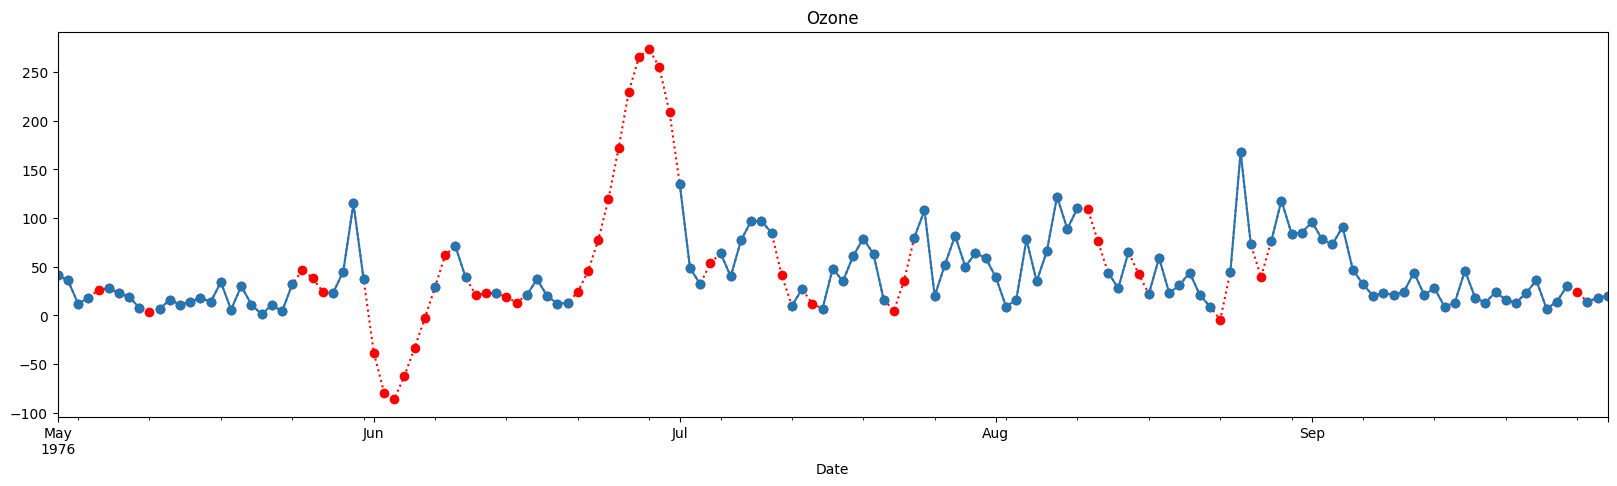

In [103]:
quadratic_imp = airquality.infer_objects().interpolate(method="quadratic")

quadratic_imp["Ozone"].plot(color="red", marker="o", linestyle="dotted", figsize=(20, 5))
airquality["Ozone"].plot(title="Ozone", marker="o")

Quadratic interpolation overshoots and produces values that seem to be out of range.

<Axes: title={'center': 'Ozone'}, xlabel='Date'>

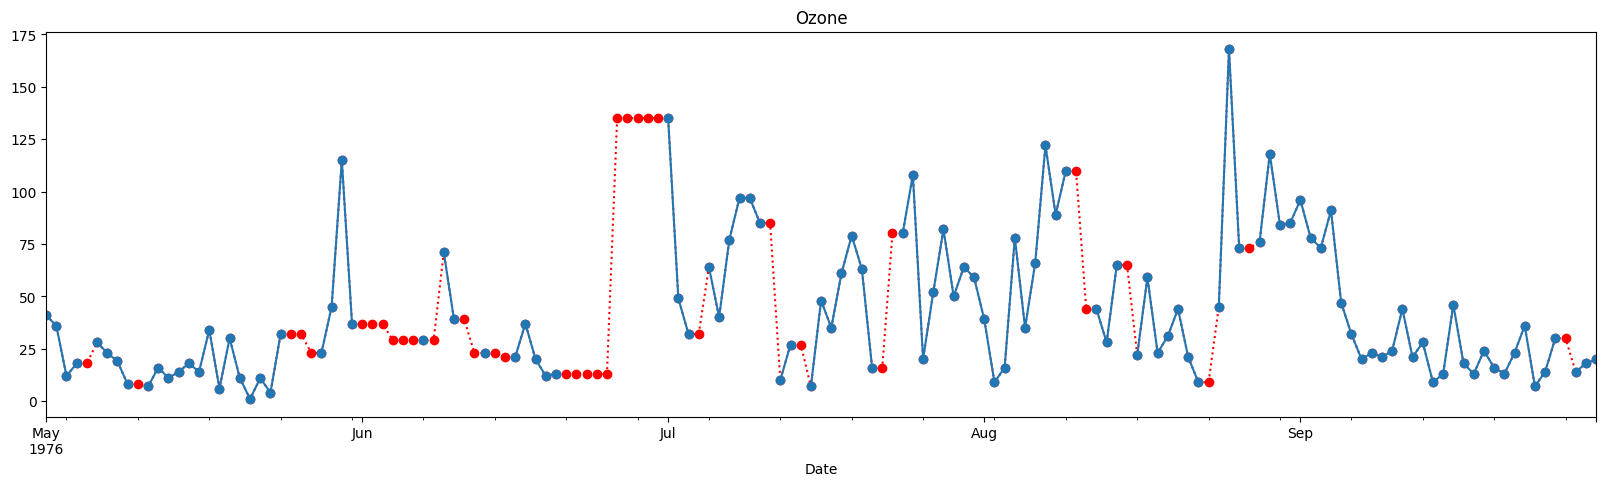

In [104]:
nearest_imp = airquality.infer_objects().interpolate(method="nearest")

nearest_imp["Ozone"].plot(color="red", marker="o", linestyle="dotted", figsize=(20, 5))
airquality["Ozone"].plot(title="Ozone", marker="o")

Nearest interpolation combines the worst of forward- and back-filling.

We can compare all the methods in a single plot as follows.

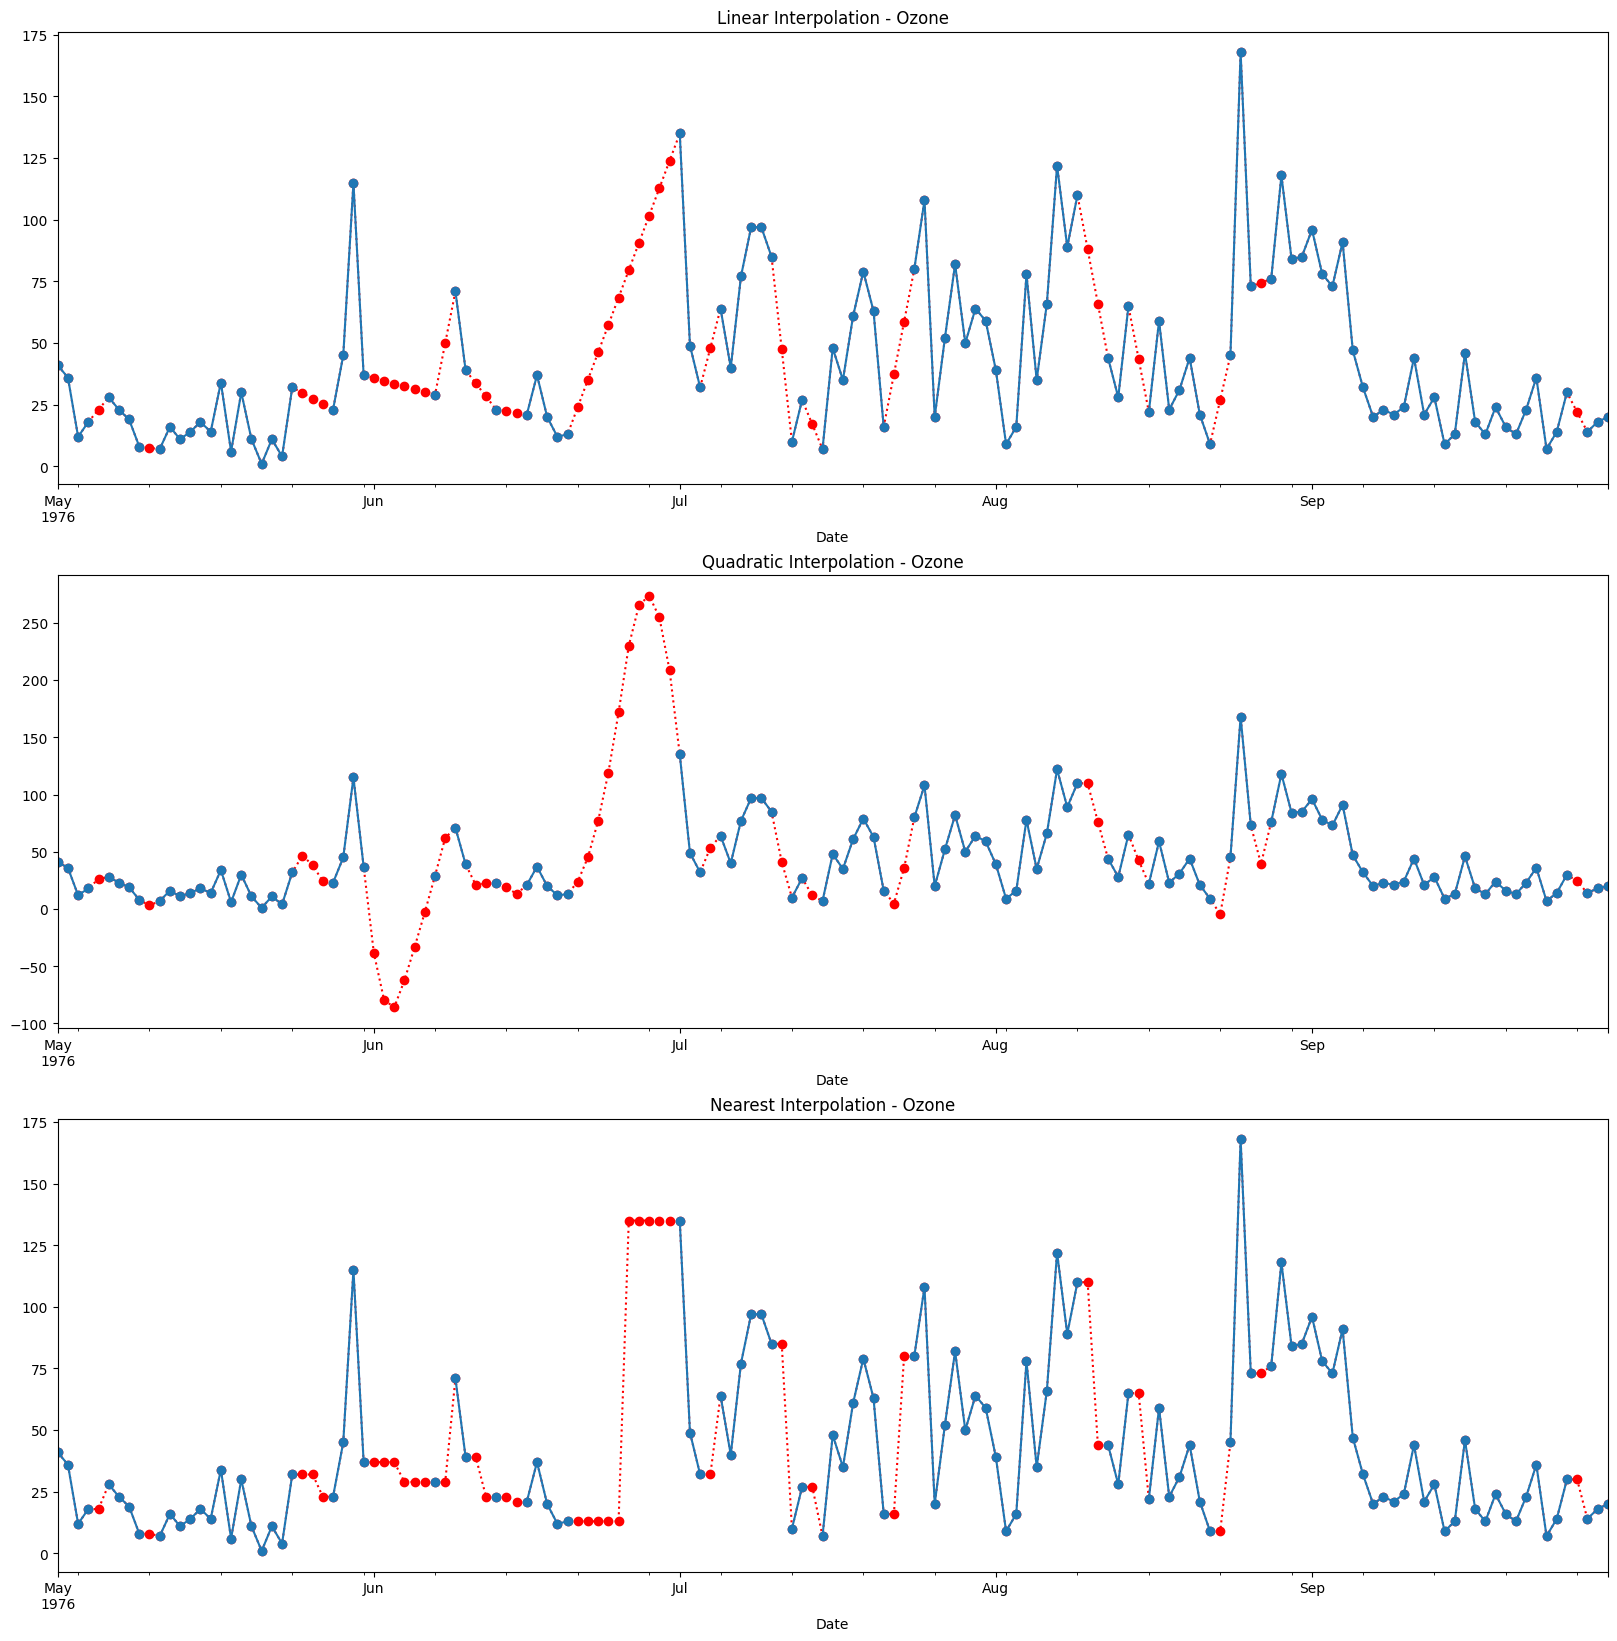

In [107]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))

interpolations = {
    "Linear Interpolation": linear_imp,
    "Quadratic Interpolation": quadratic_imp,
    "Nearest Interpolation": nearest_imp,
}

for ax, df_key in zip(axes, interpolations):
    interpolations[df_key].Ozone.plot(color="red", marker="o", linestyle="dotted", ax=ax)

    airquality.Ozone.plot(title=df_key + " - Ozone", marker="o", ax=ax)

We can see that the imputations are more complex than those created using `.fillna()`.

Comparing the time series plots of all the imputations, shows that the linear imputation best imputes the 'airquality' data. While the forward, backward and nearest fill, impute the same values to a series of missing points, the quadratic imputation overshoots the impute values. However, the linear interpolation aptly fills in incrementing or decrementing values in the DataFrame. 

#### Visualize forward fill imputation

To visualize time-series imputations, we can create two plots with the plot of original DataFrame overlapping the imputed DataFrame. Additionally, changing the `linestyle`, `color` and `marker` for the imputed DataFrame, helps to clearly distinguish the non-missing values and the imputed values. The imputed DataFrames can be plotted using the `.plot()` method.

In this exercise, you will first impute and then plot the time-series plot of forward filled DataFrame. The `airquality` DataFrame has been loaded for you.

##### Instructions 1/3

* Impute `airquality` DataFrame with the frontward fill method.

In [111]:
# reset the dataset
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

In [112]:
# bfill_imputed = airquality.fillna(method='ffill')
ffill_imputed = airquality.ffill()

##### Instructions 2/3

* Create a red colored line plot of ffill_imputed with a 'dotted' line style.

<Axes: xlabel='Date'>

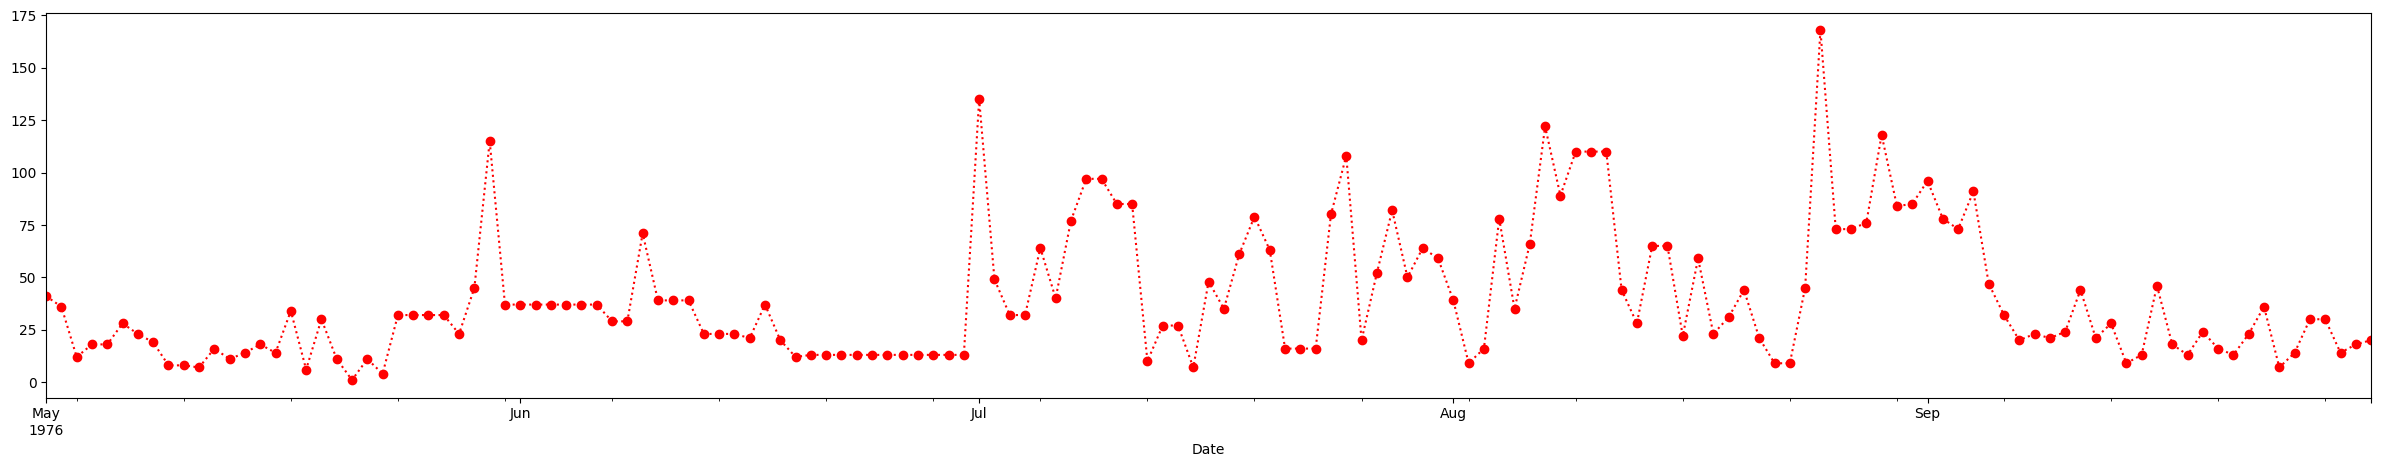

In [115]:
ffill_imputed["Ozone"].plot(color="red", marker="o", linestyle="dotted", figsize=(30, 5))

##### Instructions 3/3

* Overlay the `airquality` DataFrame on top of your plot.
* Set the title to `'Ozone'` and set marker to `'o'`.


<Axes: title={'center': 'Ozone'}, xlabel='Date'>

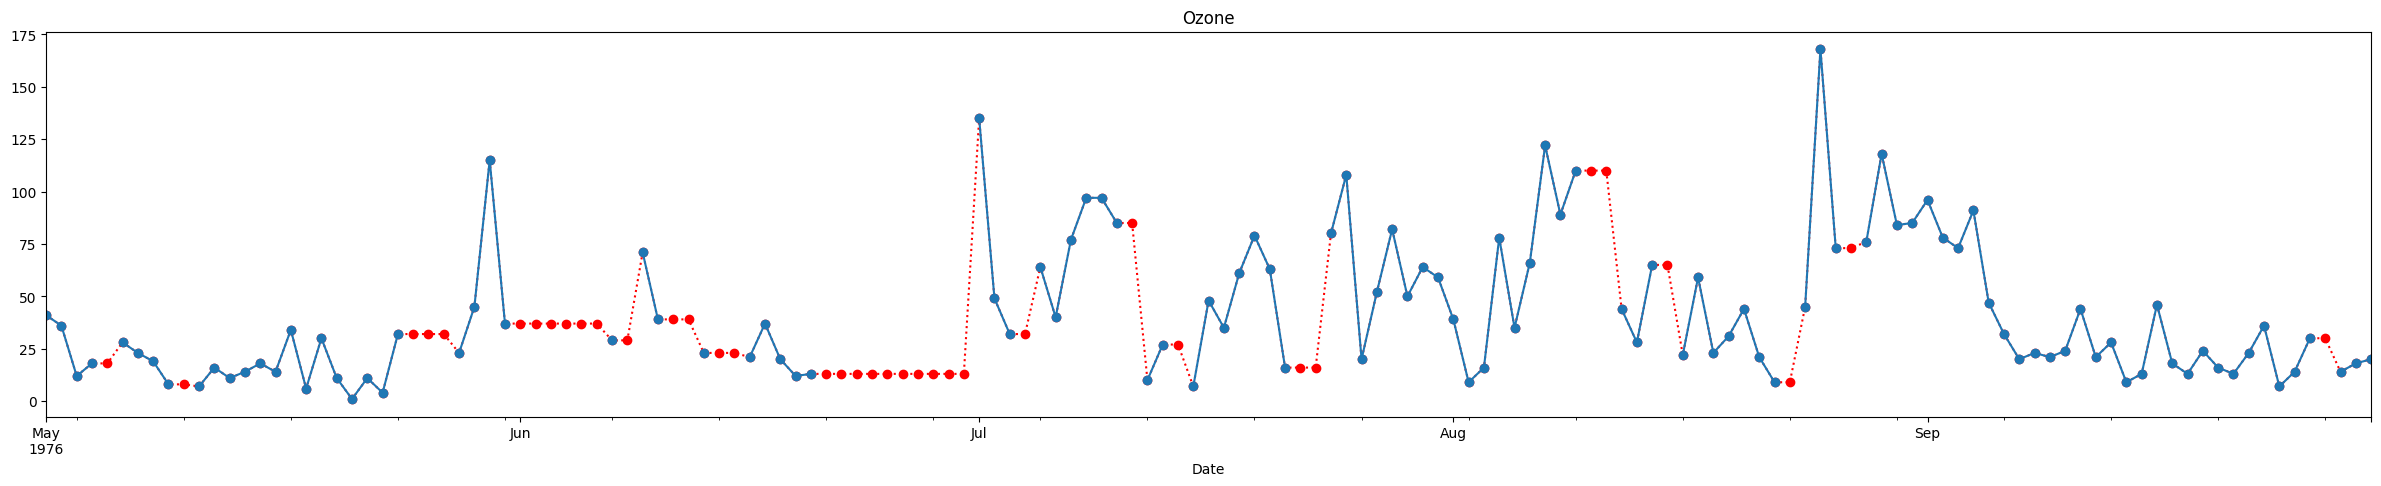

In [116]:
ffill_imputed["Ozone"].plot(color="red", marker="o", linestyle="dotted", figsize=(30, 5))
airquality["Ozone"].plot(title="Ozone", marker="o", figsize=(30, 5))

#### Visualize backward fill imputation

To understand the quality of imputations, it is important to analyze how the imputations vary with respect to the actual dataset. The quickest way to do so is by visualizing the imputations.

In the previous exercise, you visualized the time-series forward filled imputation of `airquality` DataFrame. In this exercise, you will visualize the backward filled imputation of `airquality` DataFrame.

##### Instructions 1/3

* Impute `airquality` with the backward fill method.

In [117]:
# bfill_imputed = airquality.fillna(method='bfill')
bfill_imputed = airquality.bfill()

##### Instructions 2/3

* Create a red colored line plot of `bfill_imputed` with a `'dotted'` line style with `'o'` for markers.

<Axes: xlabel='Date'>

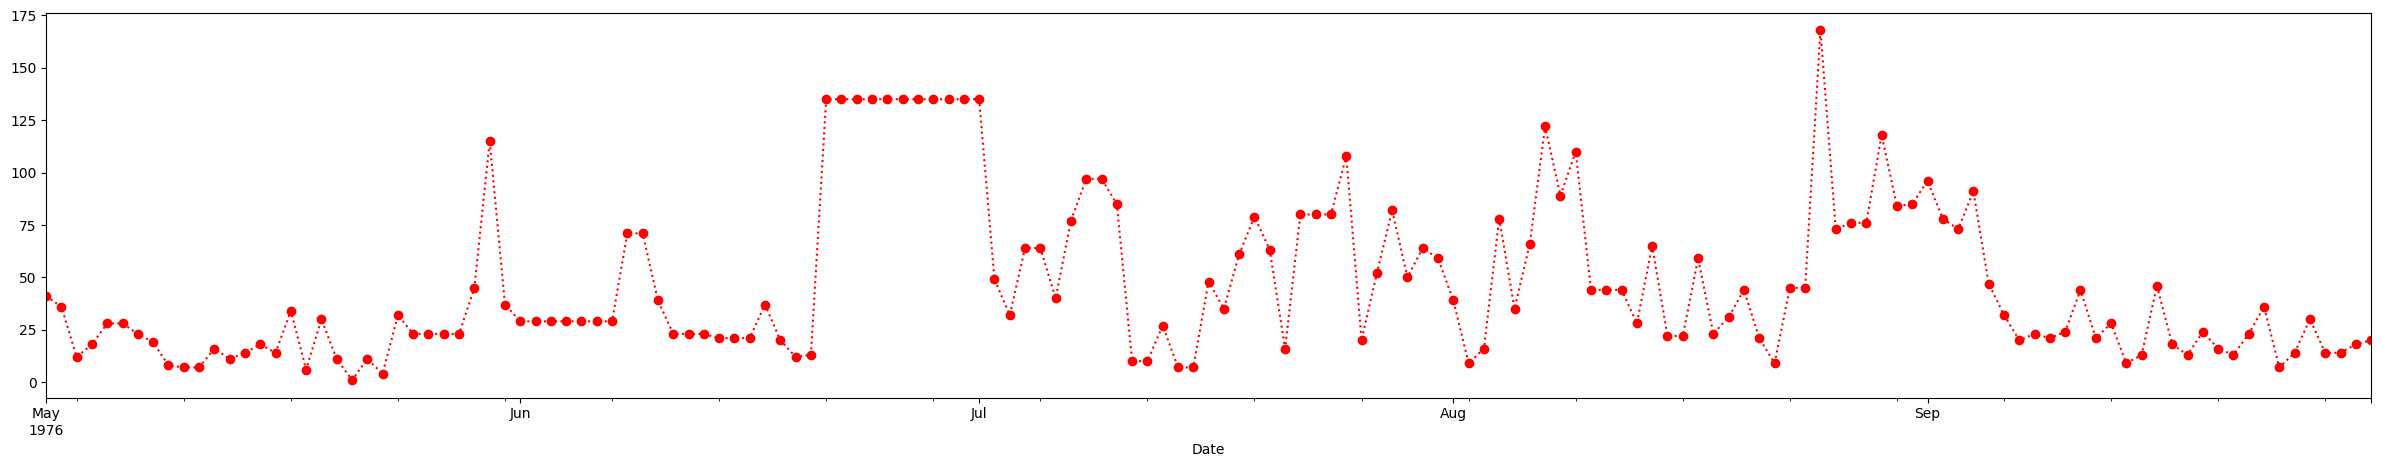

In [118]:
bfill_imputed["Ozone"].plot(color="red", linestyle="dotted", marker="o", figsize=(30, 5))

##### Instructions 3/3

* Overlay the `airquality` DataFrame on top of your plot.
* Set the title to `'Ozone'` and set marker to `'o'`.


<Axes: title={'center': 'Ozone'}, xlabel='Date'>

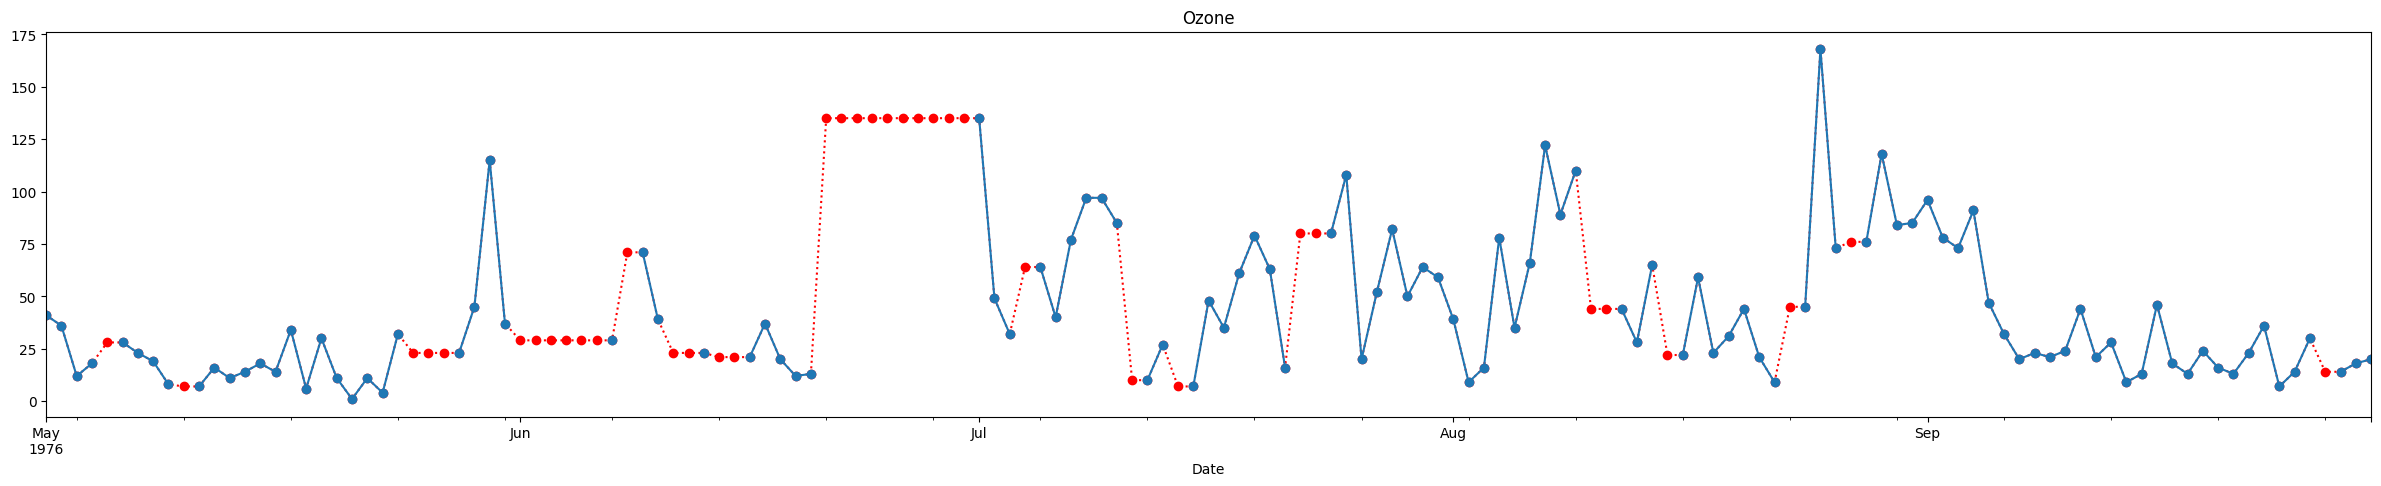

In [119]:
bfill_imputed["Ozone"].plot(color="red", linestyle="dotted", marker="o", figsize=(30, 5))
airquality["Ozone"].plot(title="Ozone", marker="o", figsize=(30, 5))

#### Plot interpolations

Plotting comparative graphs for the imputations is essential for inferring the best imputation technique. In this exercise, you'll create a for loop for generating plots for multiple imputation techniques. You will create the plots of the imputations you performed in the previous lesson i.e., the linear, the quadratic, and the nearest interpolation techniques.

Three DataFrames named after their imputation techniques have already been imported for you, namely, `linear_interp`, `quadratic_interp`, and `nearest_interp`

##### Instructions

* Create 3 subplots for each imputation technique.
* Create the `interpolations` dictionary by mapping the `linear_interp`, `quadratic_interp`, and `nearest_interp` DataFrames to the relevant interpolation technique.
* Loop over `axes` and `interpolations`.
* Select each DataFrame in `interpolations` and set the title for a DataFrame using `df_key`.

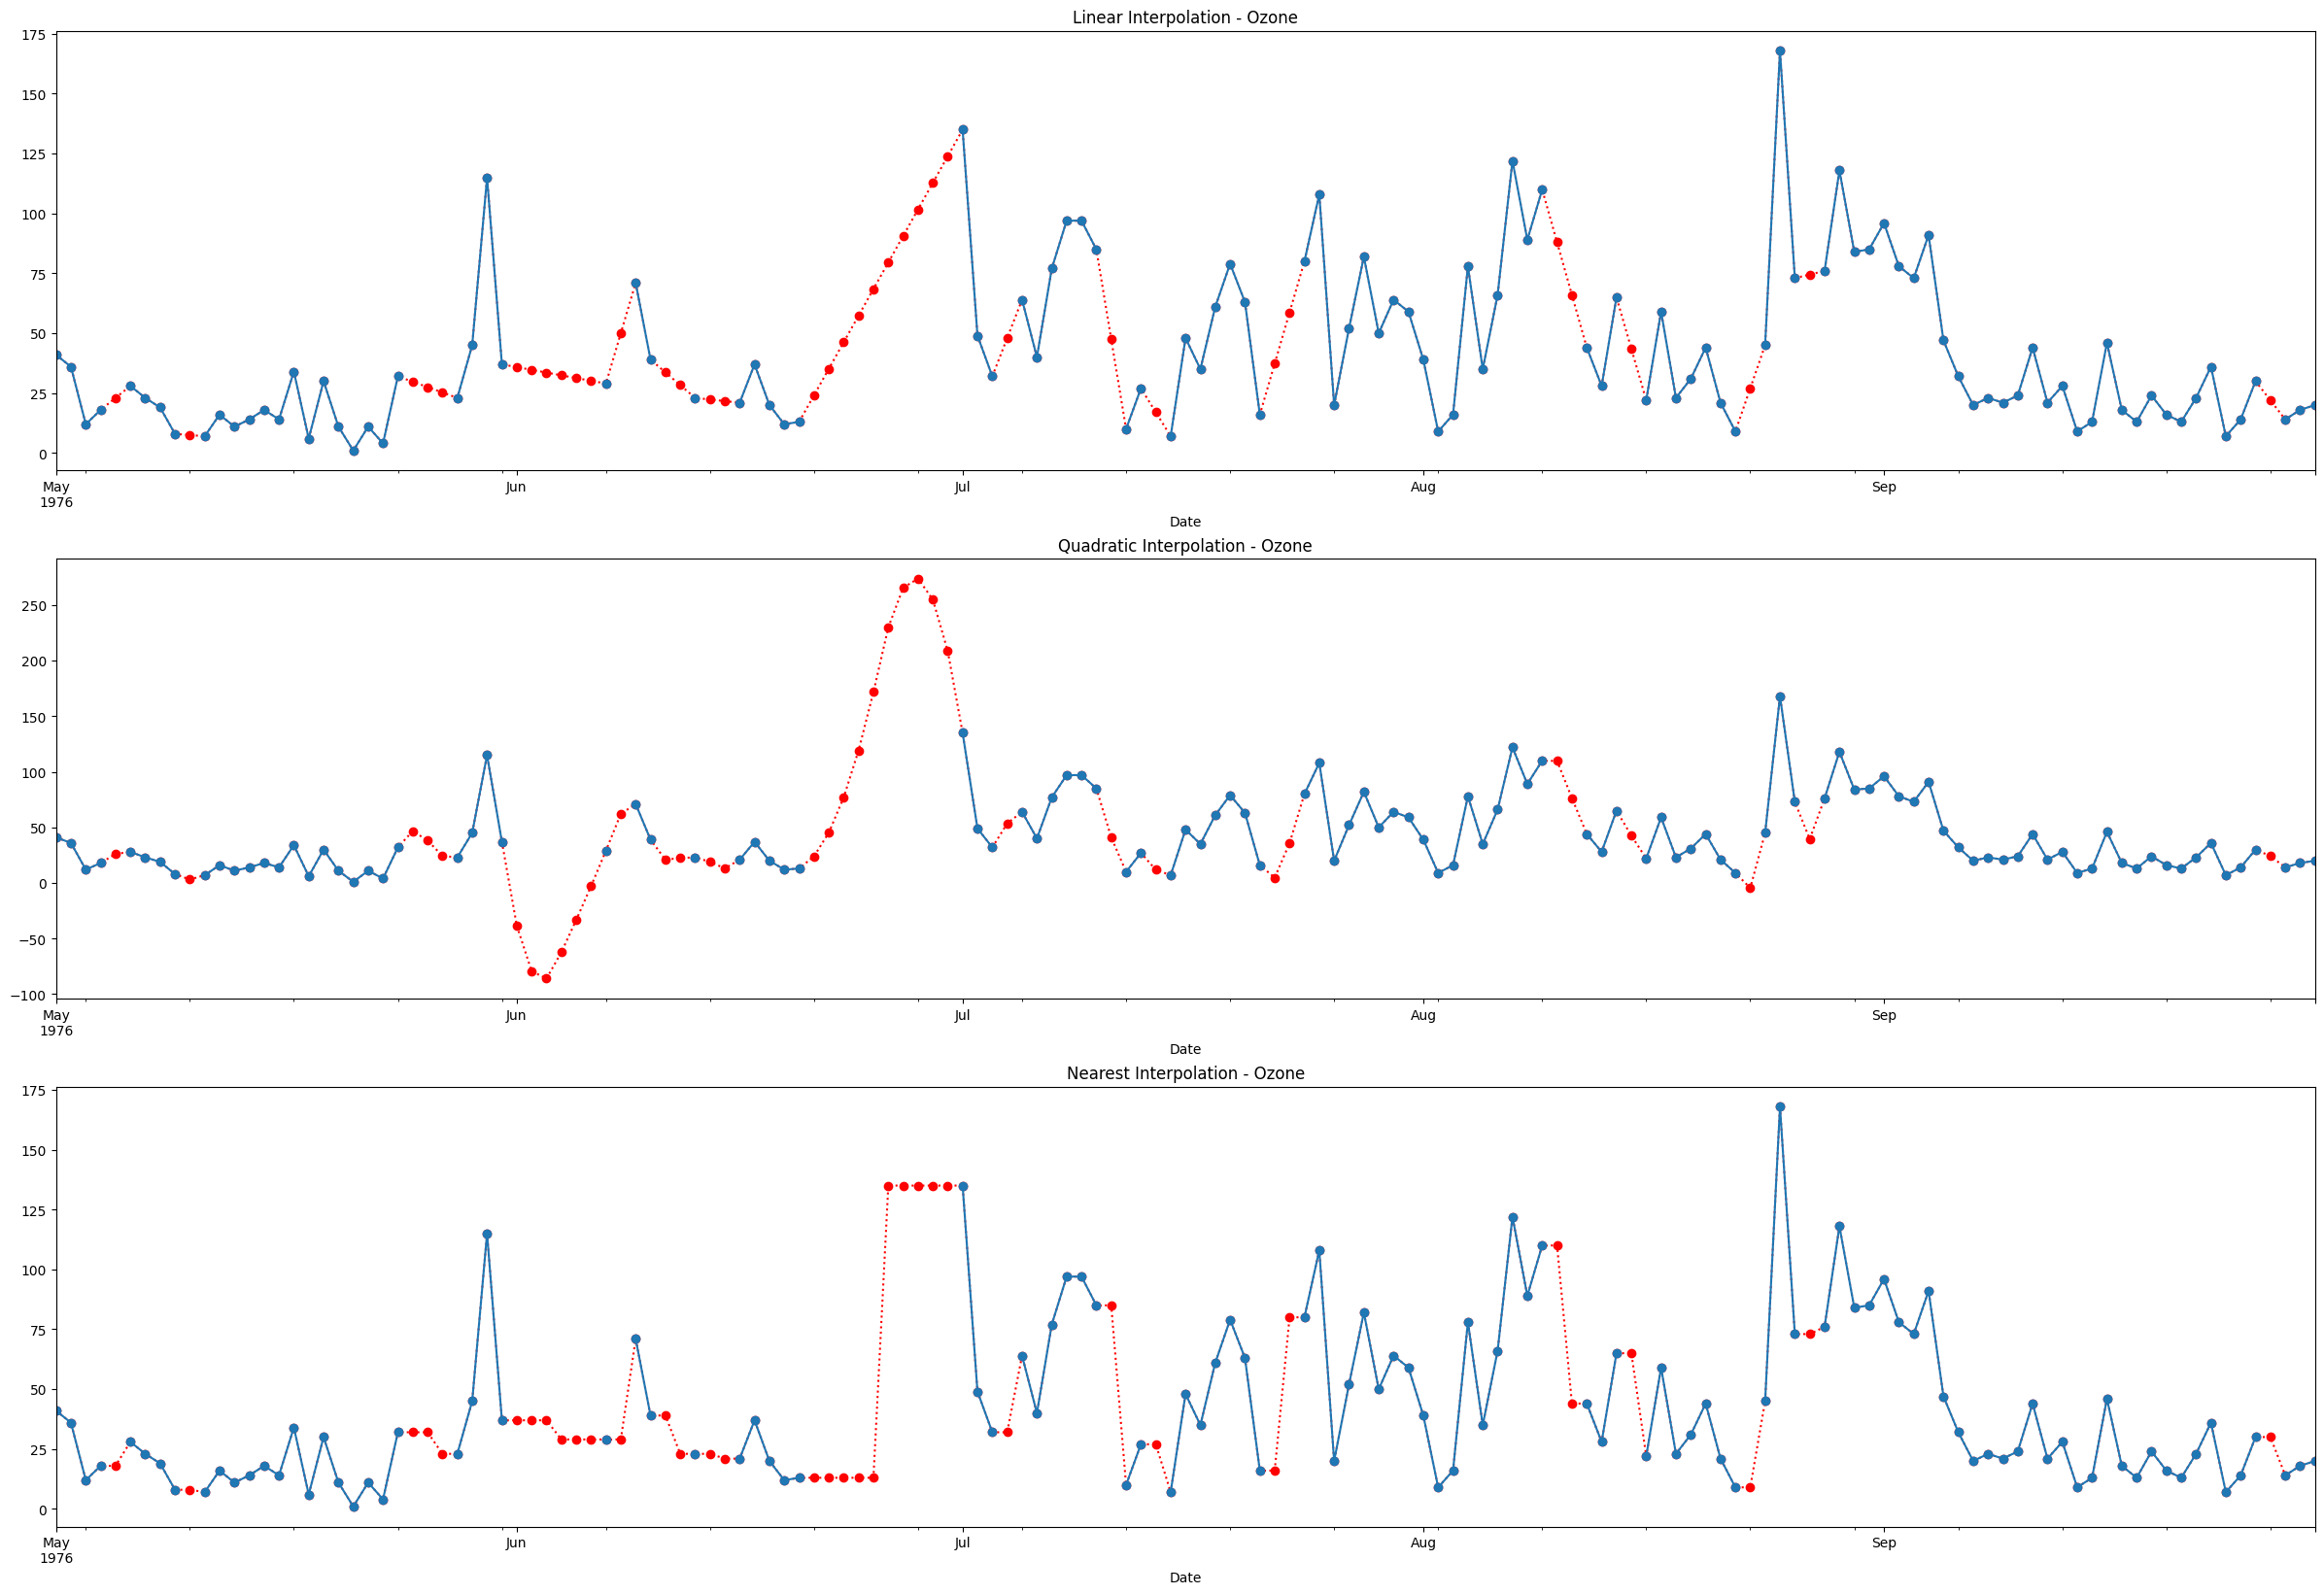

In [126]:
linear_interp = linear_imp.copy(deep=True)
quadratic_interp = quadratic_imp.copy(deep=True)
nearest_interp = nearest_imp.copy(deep=True)

fig, axes = plt.subplots(3, 1, figsize=(30, 20))

interpolations = {
    "Linear Interpolation": linear_interp,
    "Quadratic Interpolation": quadratic_interp,
    "Nearest Interpolation": nearest_interp,
}

for ax, df_key in zip(axes, interpolations):
    interpolations[df_key].Ozone.plot(color="red", marker="o", linestyle="dotted", ax=ax)
    airquality.Ozone.plot(title=df_key + " - Ozone", marker="o", ax=ax)